## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  10.917124   997.578049  0.115910   8.147981  1.594443
1  19.615687   931.018112  0.309334  10.692976  1.516391
2   2.229468  1289.282218  0.813046  10.182281  1.618255
3  62.969713  1400.451662  0.696732   1.892403  1.406894
4  89.942717   462.451908  0.882575   3.349098  1.273527


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0149352	total: 69.4ms	remaining: 1m 9s
1:	learn: 1.0083964	total: 70.1ms	remaining: 35s
2:	learn: 0.9993655	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9904410	total: 71.5ms	remaining: 17.8s
4:	learn: 0.9824573	total: 72.1ms	remaining: 14.3s
5:	learn: 0.9743591	total: 72.6ms	remaining: 12s
6:	learn: 0.9648542	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9537591	total: 73.5ms	remaining: 9.12s
8:	learn: 0.9457348	total: 74ms	remaining: 8.15s
9:	learn: 0.9357389	total: 74.5ms	remaining: 7.37s
10:	learn: 0.9263992	total: 74.9ms	remaining: 6.73s
11:	learn: 0.9175863	total: 75.4ms	remaining: 6.21s
12:	learn: 0.9085763	total: 75.9ms	remaining: 5.76s
13:	learn: 0.9014201	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8925554	total: 77ms	remaining: 5.05s
15:	learn: 0.8846962	total: 77.5ms	remaining: 4.76s
16:	learn: 0.8733989	total: 77.9ms	remaining: 4.5s
17:	learn: 0.8677795	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8608599	total: 78.7ms	remaining: 4.07s
1

85:	learn: 0.4975434	total: 109ms	remaining: 1.16s
86:	learn: 0.4941532	total: 110ms	remaining: 1.15s
87:	learn: 0.4907490	total: 110ms	remaining: 1.14s
88:	learn: 0.4868508	total: 111ms	remaining: 1.13s
89:	learn: 0.4840655	total: 111ms	remaining: 1.12s
90:	learn: 0.4799619	total: 111ms	remaining: 1.11s
91:	learn: 0.4770043	total: 112ms	remaining: 1.1s
92:	learn: 0.4741139	total: 112ms	remaining: 1.09s
93:	learn: 0.4705337	total: 113ms	remaining: 1.08s
94:	learn: 0.4673183	total: 113ms	remaining: 1.07s
95:	learn: 0.4633803	total: 113ms	remaining: 1.07s
96:	learn: 0.4604144	total: 114ms	remaining: 1.06s
97:	learn: 0.4574658	total: 114ms	remaining: 1.05s
98:	learn: 0.4546323	total: 114ms	remaining: 1.04s
99:	learn: 0.4514936	total: 115ms	remaining: 1.03s
100:	learn: 0.4481113	total: 115ms	remaining: 1.02s
101:	learn: 0.4458210	total: 116ms	remaining: 1.02s
102:	learn: 0.4427262	total: 116ms	remaining: 1.01s
103:	learn: 0.4398534	total: 117ms	remaining: 1s
104:	learn: 0.4369679	total: 11

261:	learn: 0.2014171	total: 187ms	remaining: 527ms
262:	learn: 0.2006155	total: 188ms	remaining: 526ms
263:	learn: 0.1997314	total: 188ms	remaining: 524ms
264:	learn: 0.1991248	total: 188ms	remaining: 523ms
265:	learn: 0.1982401	total: 190ms	remaining: 523ms
266:	learn: 0.1975196	total: 190ms	remaining: 521ms
267:	learn: 0.1970940	total: 190ms	remaining: 520ms
268:	learn: 0.1964032	total: 191ms	remaining: 518ms
269:	learn: 0.1958181	total: 191ms	remaining: 517ms
270:	learn: 0.1950966	total: 191ms	remaining: 515ms
271:	learn: 0.1944942	total: 192ms	remaining: 513ms
272:	learn: 0.1935019	total: 192ms	remaining: 512ms
273:	learn: 0.1930472	total: 192ms	remaining: 510ms
274:	learn: 0.1925542	total: 193ms	remaining: 508ms
275:	learn: 0.1920856	total: 193ms	remaining: 507ms
276:	learn: 0.1913530	total: 194ms	remaining: 506ms
277:	learn: 0.1905220	total: 194ms	remaining: 504ms
278:	learn: 0.1899135	total: 194ms	remaining: 502ms
279:	learn: 0.1892755	total: 195ms	remaining: 501ms
280:	learn: 

497:	learn: 0.1000958	total: 291ms	remaining: 294ms
498:	learn: 0.0998393	total: 292ms	remaining: 293ms
499:	learn: 0.0997359	total: 292ms	remaining: 292ms
500:	learn: 0.0995113	total: 293ms	remaining: 292ms
501:	learn: 0.0992615	total: 293ms	remaining: 291ms
502:	learn: 0.0991611	total: 294ms	remaining: 290ms
503:	learn: 0.0990706	total: 294ms	remaining: 289ms
504:	learn: 0.0988271	total: 295ms	remaining: 289ms
505:	learn: 0.0987383	total: 295ms	remaining: 288ms
506:	learn: 0.0985229	total: 295ms	remaining: 287ms
507:	learn: 0.0983055	total: 296ms	remaining: 287ms
508:	learn: 0.0981557	total: 296ms	remaining: 286ms
509:	learn: 0.0979431	total: 297ms	remaining: 285ms
510:	learn: 0.0978487	total: 297ms	remaining: 284ms
511:	learn: 0.0977638	total: 298ms	remaining: 284ms
512:	learn: 0.0976547	total: 298ms	remaining: 283ms
513:	learn: 0.0974062	total: 299ms	remaining: 282ms
514:	learn: 0.0972792	total: 299ms	remaining: 282ms
515:	learn: 0.0970722	total: 300ms	remaining: 281ms
516:	learn: 

674:	learn: 0.0692161	total: 369ms	remaining: 178ms
675:	learn: 0.0691037	total: 369ms	remaining: 177ms
676:	learn: 0.0689991	total: 370ms	remaining: 176ms
677:	learn: 0.0688465	total: 370ms	remaining: 176ms
678:	learn: 0.0686999	total: 371ms	remaining: 175ms
679:	learn: 0.0685893	total: 371ms	remaining: 175ms
680:	learn: 0.0683510	total: 371ms	remaining: 174ms
681:	learn: 0.0682011	total: 372ms	remaining: 173ms
682:	learn: 0.0681564	total: 372ms	remaining: 173ms
683:	learn: 0.0680541	total: 373ms	remaining: 172ms
684:	learn: 0.0679060	total: 373ms	remaining: 172ms
685:	learn: 0.0677626	total: 374ms	remaining: 171ms
686:	learn: 0.0676546	total: 374ms	remaining: 170ms
687:	learn: 0.0673796	total: 375ms	remaining: 170ms
688:	learn: 0.0671078	total: 375ms	remaining: 169ms
689:	learn: 0.0670643	total: 375ms	remaining: 169ms
690:	learn: 0.0670215	total: 376ms	remaining: 168ms
691:	learn: 0.0669748	total: 376ms	remaining: 167ms
692:	learn: 0.0667658	total: 377ms	remaining: 167ms
693:	learn: 

915:	learn: 0.0425422	total: 473ms	remaining: 43.4ms
916:	learn: 0.0425232	total: 474ms	remaining: 42.9ms
917:	learn: 0.0423614	total: 474ms	remaining: 42.4ms
918:	learn: 0.0422893	total: 475ms	remaining: 41.8ms
919:	learn: 0.0422499	total: 475ms	remaining: 41.3ms
920:	learn: 0.0422110	total: 475ms	remaining: 40.8ms
921:	learn: 0.0421398	total: 476ms	remaining: 40.2ms
922:	learn: 0.0421014	total: 476ms	remaining: 39.7ms
923:	learn: 0.0419559	total: 477ms	remaining: 39.2ms
924:	learn: 0.0418856	total: 477ms	remaining: 38.7ms
925:	learn: 0.0418477	total: 477ms	remaining: 38.1ms
926:	learn: 0.0416916	total: 478ms	remaining: 37.6ms
927:	learn: 0.0416545	total: 478ms	remaining: 37.1ms
928:	learn: 0.0416178	total: 479ms	remaining: 36.6ms
929:	learn: 0.0415484	total: 479ms	remaining: 36ms
930:	learn: 0.0415122	total: 479ms	remaining: 35.5ms
931:	learn: 0.0414764	total: 480ms	remaining: 35ms
932:	learn: 0.0413354	total: 480ms	remaining: 34.5ms
933:	learn: 0.0413166	total: 481ms	remaining: 34ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

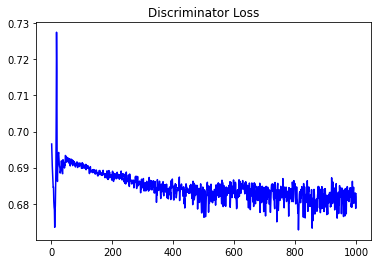

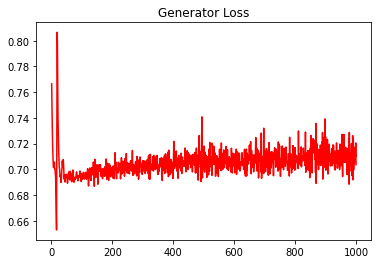

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.25589600091225306


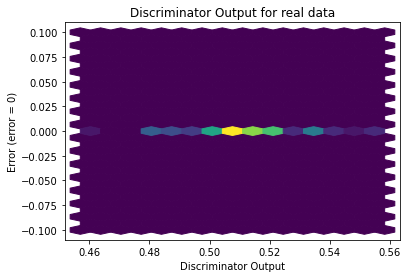

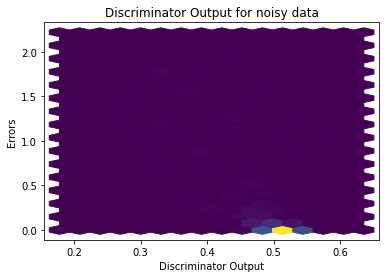

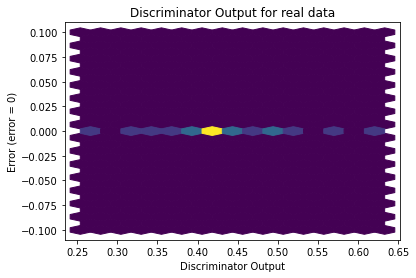

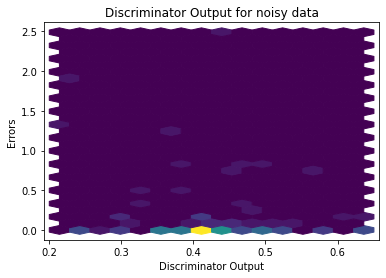

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


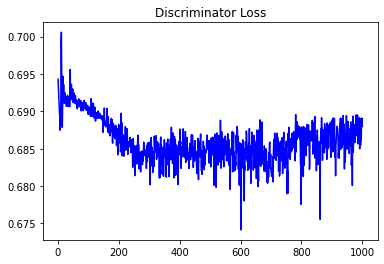

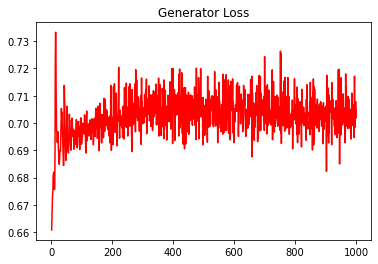

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21256342309776396


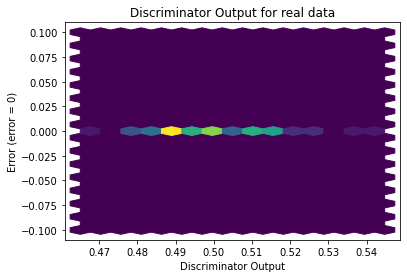

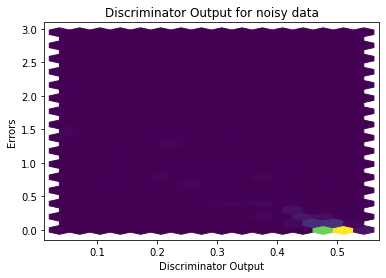

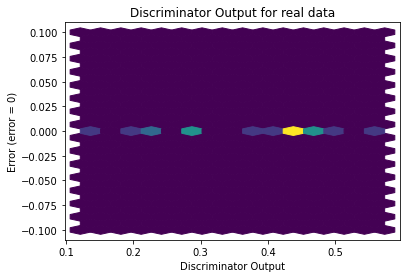

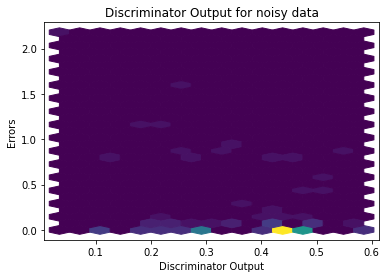

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8840]], requires_grad=True)
